In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from mlxtend.plotting import plot_confusion_matrix
#To turn off warning messages.
import warnings
warnings.filterwarnings('ignore')

In [8]:
# pip install -U scikit-learn

In [9]:
# pip install mlxtend

In [10]:
import plotly.express as px
import seaborn as sns

In [11]:
data=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [12]:
data
df=pd.DataFrame(data)

In [13]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [15]:
for col in df[["sex" ,  "chest pain type" , "fasting blood sugar","resting ecg" , "exercise angina" , "ST slope"  , "target"]]:
    print(df[col].value_counts()) 
    print("---------------------------")

sex
1    909
0    281
Name: count, dtype: int64
---------------------------
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64
---------------------------
fasting blood sugar
0    936
1    254
Name: count, dtype: int64
---------------------------
resting ecg
0    684
2    325
1    181
Name: count, dtype: int64
---------------------------
exercise angina
0    729
1    461
Name: count, dtype: int64
---------------------------
ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64
---------------------------
target
1    629
0    561
Name: count, dtype: int64
---------------------------


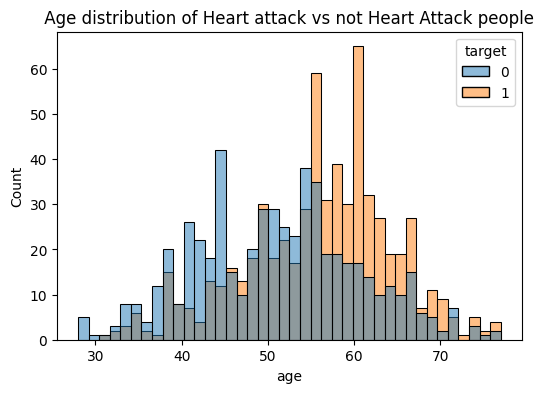

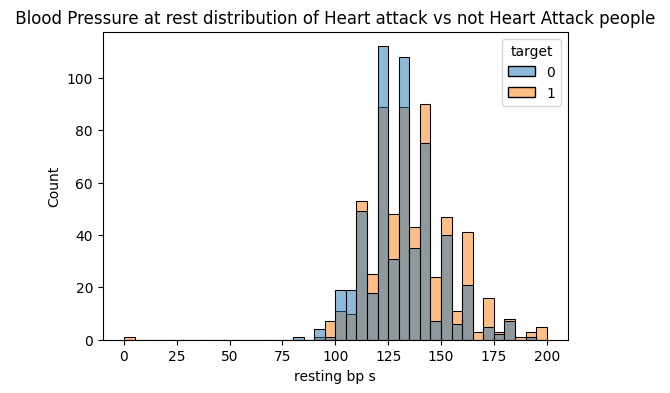

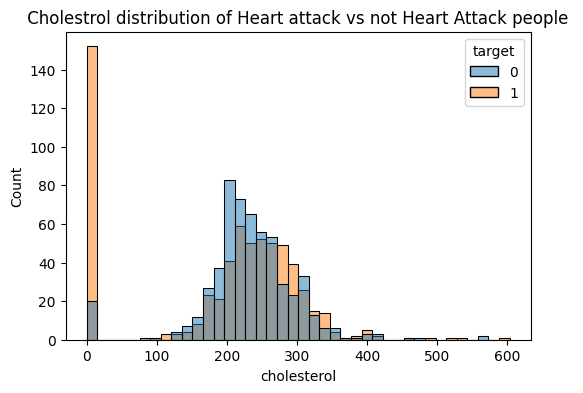

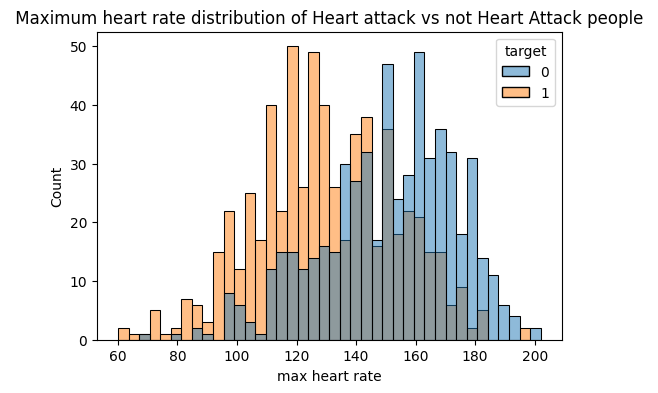

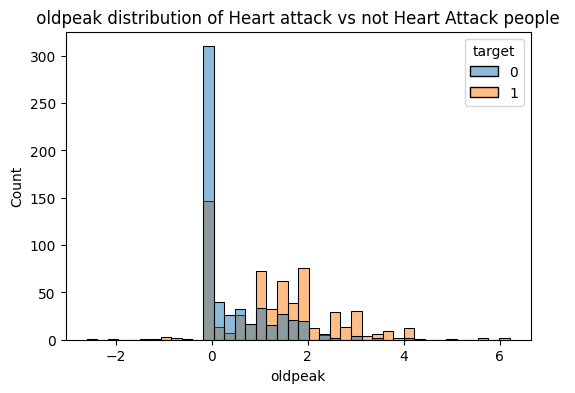

In [16]:
Dictionary={"age":"Age" , "resting bp s":"Blood Pressure at rest" , "cholesterol":"Cholestrol", "max heart rate":"Maximum heart rate" , "oldpeak":"oldpeak"}

for col in df[["age","resting bp s","cholesterol", "max heart rate","oldpeak"]]:
    plt.figure(figsize=(6 , 4))
    sns.histplot(x=col, data=df , bins=40  , hue="target")
    plt.title(f" {Dictionary[col]} distribution of Heart attack vs not Heart Attack people ")
    plt.show()

<Figure size 1000x800 with 0 Axes>

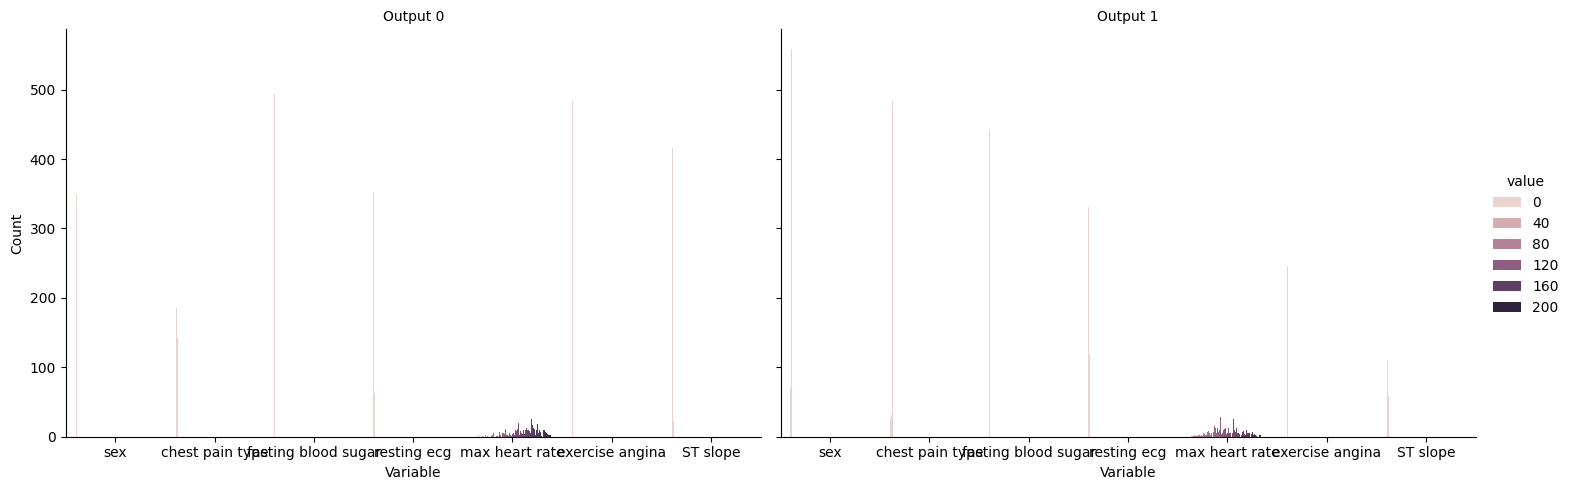

In [17]:
cols = ['sex', 'chest pain type','fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'ST slope']
plt.figure(figsize=(10 , 8))
df_long = pd.melt(df, id_vars=["target"], value_vars=cols)

diagram = sns.catplot( x="variable", hue="value", col="target",data=df_long, kind="count",aspect=1.5)

diagram.set_axis_labels("Variable", "Count")
diagram.set_titles("Output {col_name}")
plt.show()

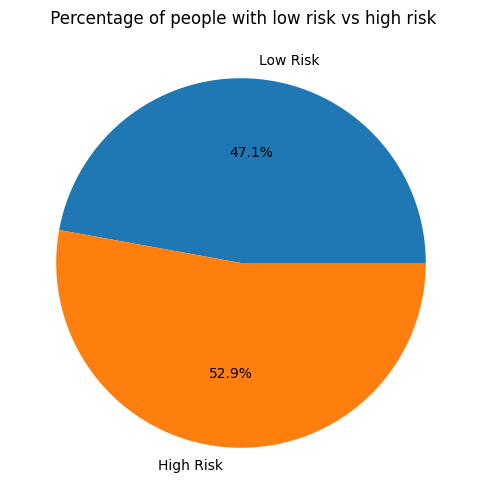

In [18]:
plt.figure(figsize=(8 , 6))
labels=["Low Risk" , "High Risk"]
sizes=[df.target.value_counts()[0] ,df.target.value_counts()[1]]
plt.pie(sizes, labels=labels , autopct='%1.1f%%')
plt.title(" Percentage of people with low risk vs high risk")
plt.axis('off')
plt.show()
# label data are almost balance 

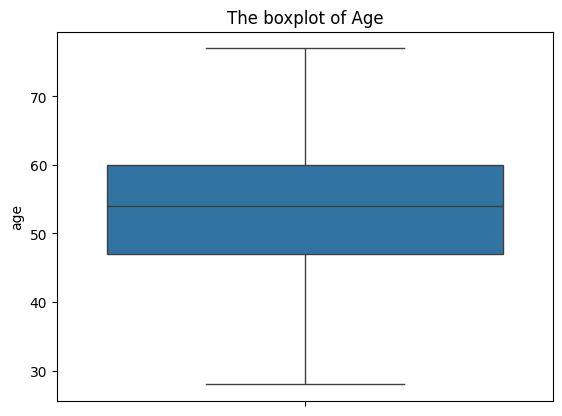

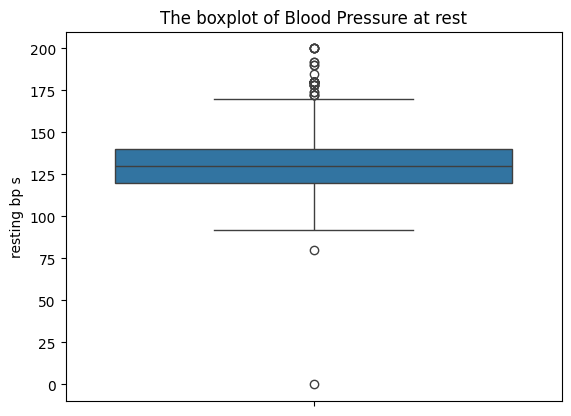

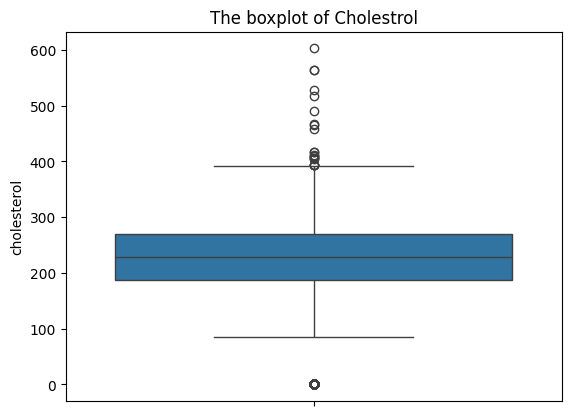

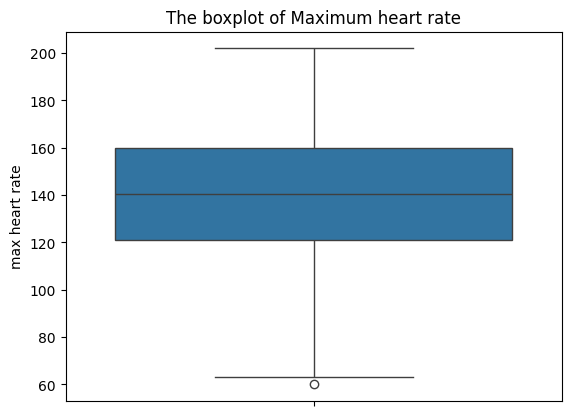

In [19]:
Dictionary={"age":"Age" , "resting bp s":"Blood Pressure at rest" , "cholesterol":"Cholestrol", "max heart rate":"Maximum heart rate"}
for col in df[["age" , "resting bp s" ,  "cholesterol" , "max heart rate"]]:
    sns.boxplot(y=col , data=df)
    plt.xlabel={col}
    plt.title(f"The boxplot of {Dictionary[col]}")
    plt.show()

In [20]:
def outlier (col):
    print(col)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    upper_array = np.where(df[col]>=upper)[0]
    lower_array = np.where(df[col]<=lower)[0]

    df.drop(index=upper_array, inplace=True)
    df.drop(index=lower_array, inplace=True)

    df.reset_index(drop=True, inplace=True)


In [21]:
# df['chol'].plot()
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [22]:
df['cholesterol']

0       289
1       180
2       283
3       214
4       195
       ... 
1185    264
1186    193
1187    131
1188    236
1189    175
Name: cholesterol, Length: 1190, dtype: int64

In [23]:
for col in ["age" ,"resting bp s" ,  "cholesterol" , "max heart rate" , "oldpeak"]:
    outlier(col)

age
resting bp s
cholesterol
max heart rate
oldpeak


In [24]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
933,45,1,1,110,264,0,0,132,0,1.2,2,1
934,68,1,4,144,193,1,0,141,0,3.4,2,1
935,57,1,4,130,131,0,0,115,1,1.2,2,1
936,57,0,2,130,236,0,2,174,0,0.0,2,1


In [25]:
col = 'cholesterol'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(lower)
print(upper)

upper_array = np.where(df[col]>=upper)[0]
lower_array = np.where(df[col]<=lower)[0]

print(upper_array)
print(lower_array)

# df.drop(index=upper_array, inplace=True)
# df.drop(index=lower_array, inplace=True)

112.0
368.0
[305 372 407]
[ 73  92 280 366]


In [26]:
df_long = pd.melt(df, id_vars=["target"], value_vars=cols)
df_long

,target,variable,value
0,0,sex,1
1,1,sex,0
2,0,sex,1
3,1,sex,0
4,0,sex,1
...,...,...,...
6561,1,ST slope,2
6562,1,ST slope,2
6563,1,ST slope,2
6564,1,ST slope,2


In [27]:
#EDA
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [28]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [29]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

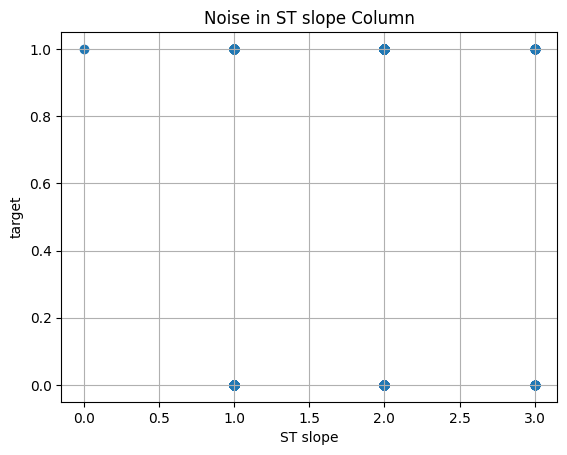

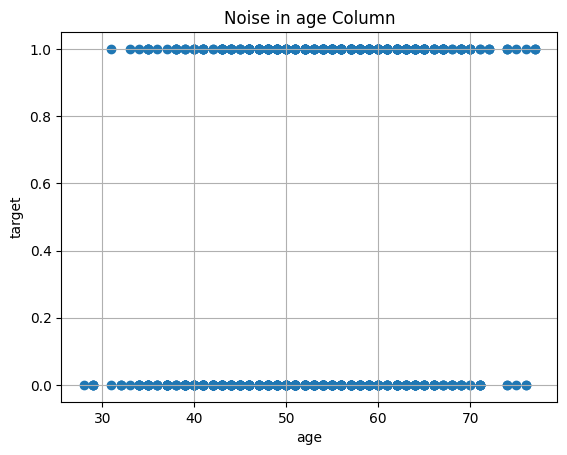

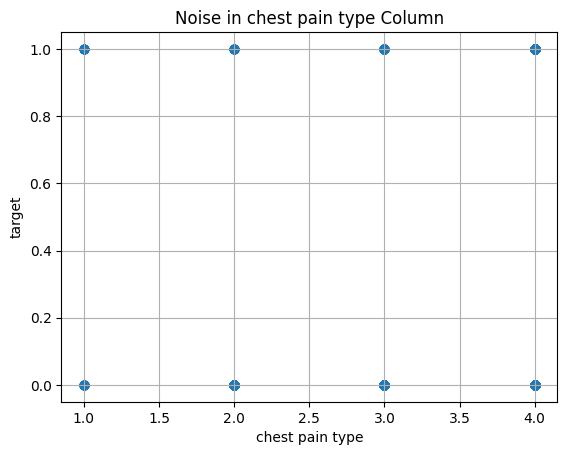

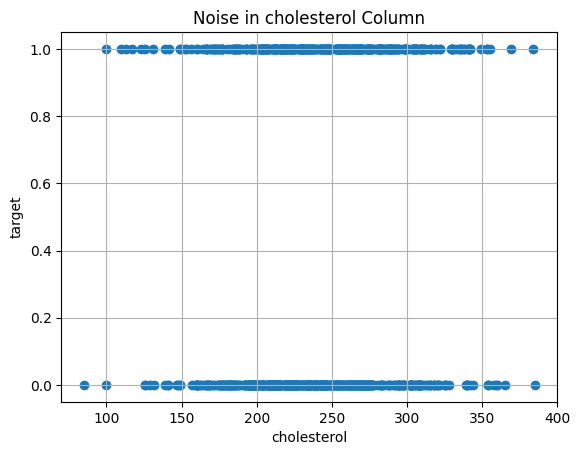

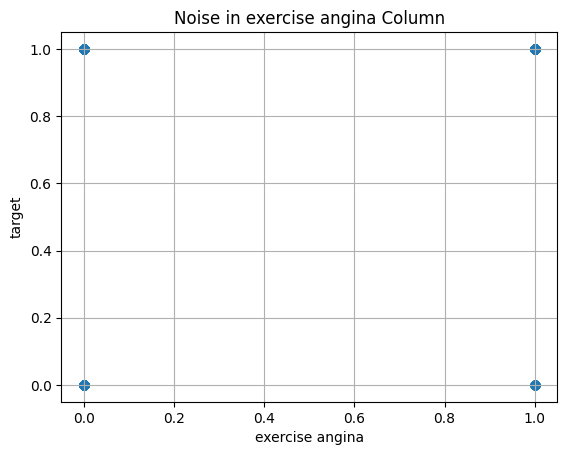

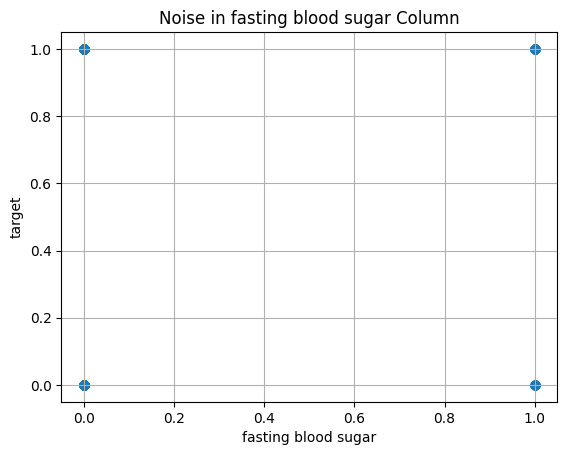

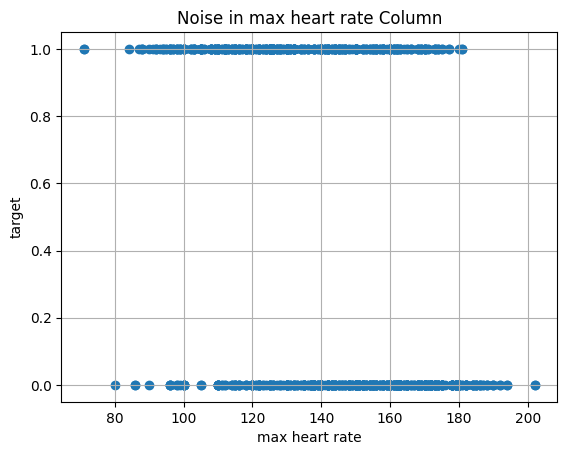

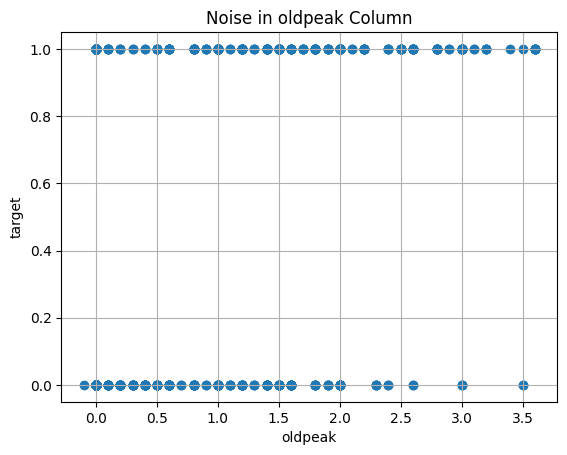

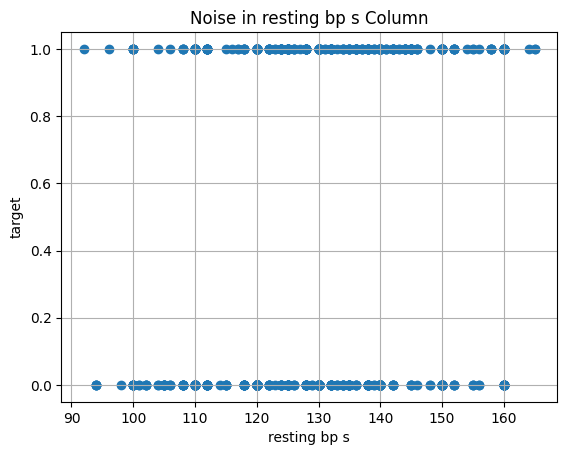

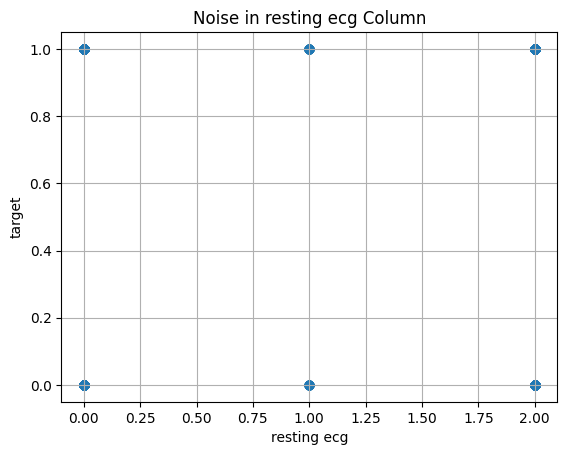

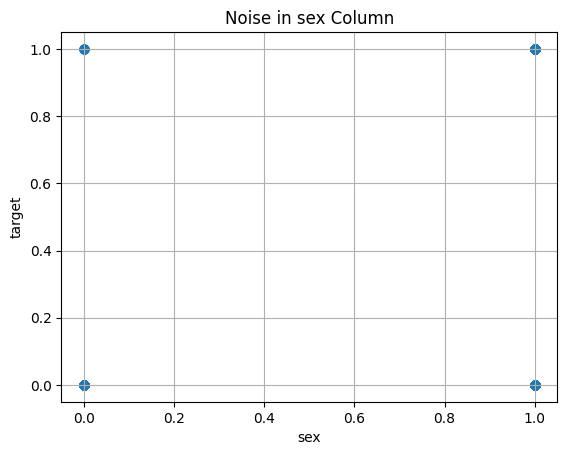

In [30]:
columns = df.columns.difference(['target']) # getting all columns except target
for col in columns:
    plt.scatter(df[col],df['target'])
    plt.title(f'Noise in ' + col + ' Column' )
    plt.xlabel(col)
    plt.ylabel('target')
    plt.grid()
    plt.show()

In [31]:
#df3=df[df['cholesterol']>0]
#Crestrol below zero has noise, that's why we remove these noises

In [32]:
#df3.describe()

In [33]:
#The minimum age is 28 years and the maximum age is 77 years

#The lowest resting bp s is 92 and the highest is 200

#The lowest cholestoral value is 85 and the highest is 603

#The lowest value of the maximum heart rate is 69 and the highest is 202

In [34]:
for i in df.columns:
    print (i,len(df[i].unique()))

age 48
sex 2
chest pain type 4
resting bp s 54
cholesterol 201
fasting blood sugar 2
resting ecg 3
max heart rate 105
exercise angina 2
oldpeak 36
ST slope 4
target 2


In [35]:
import matplotlib.pyplot as plt
matrix = df.corr()
print(matrix)
#Creating and printing a correlation matrix


                          age       sex  chest pain type  resting bp s  \
age                  1.000000  0.020338         0.141899      0.259307   
sex                  0.020338  1.000000         0.144369      0.059323   
chest pain type      0.141899  0.144369         1.000000      0.008212   
resting bp s         0.259307  0.059323         0.008212      1.000000   
cholesterol          0.104616 -0.093045         0.066771      0.096506   
fasting blood sugar  0.198878  0.096753        -0.008688      0.159173   
resting ecg          0.190797  0.016305         0.097492      0.041463   
max heart rate      -0.390133 -0.140526        -0.324924     -0.109400   
exercise angina      0.202306  0.216642         0.417503      0.115287   
oldpeak              0.267649  0.153438         0.254824      0.162316   
ST slope             0.225427  0.130159         0.277069      0.082471   
target               0.279695  0.317916         0.456432      0.141675   

                     cholesterol  fas

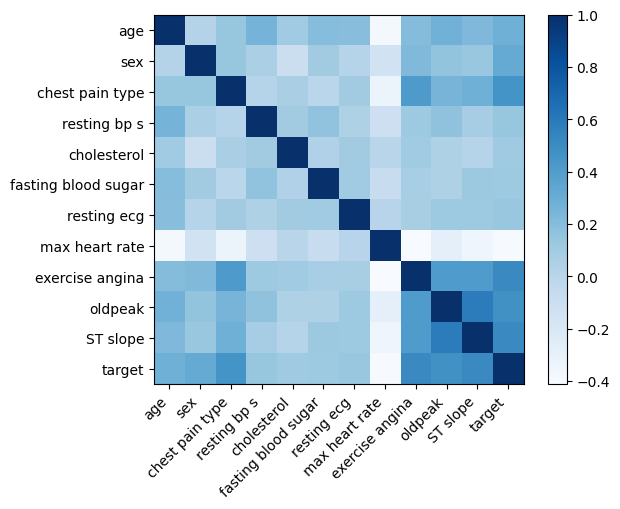

In [36]:
#plotting correlation matrix 
plt.imshow(matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

# Adding labels to the matrix
plt.xticks(range(len(matrix)), matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(matrix)), matrix.columns)
# Display the plot
plt.show()


In [37]:
#feature selectiojn 


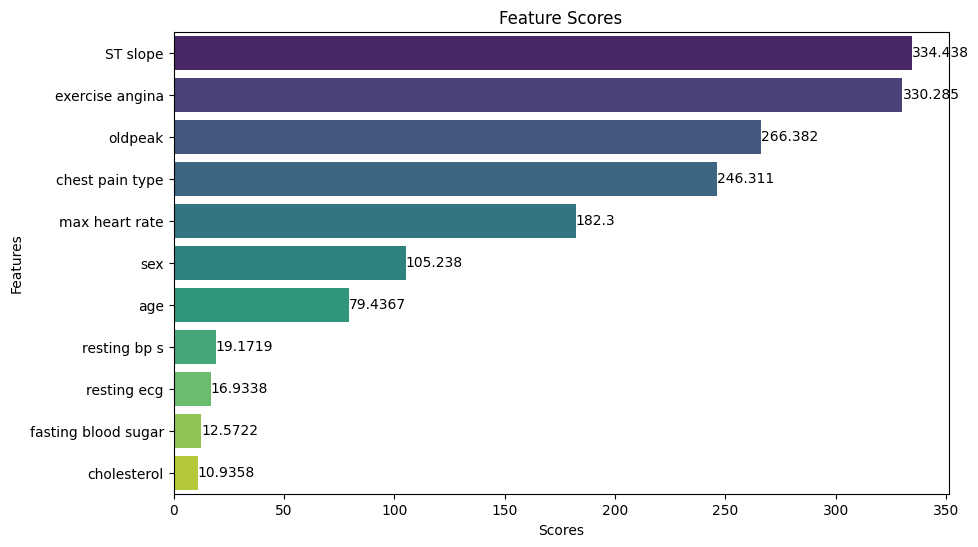

In [38]:
# Feature selection using SelectKBest with ANOVA F-value
X = df.drop(["target"], axis = 1)  
y = df["target"] 
selector = SelectKBest(f_classif, k=13)
X_selected = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
feature_scores = selector.scores_[selector.get_support()]

# Create a DataFrame to store the feature names and their scores
feature_scores_data_set = pd.DataFrame({'Features': selected_features, 'Scores': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_data_set = feature_scores_data_set.sort_values(by='Scores', ascending=False)

# Plot the feature scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Scores', y='Features', data=feature_scores_data_set, palette='viridis')
plt.title('Feature Scores')
plt.xlabel('Scores')
plt.ylabel('Features')
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [39]:
X
    

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
933,45,1,1,110,264,0,0,132,0,1.2,2
934,68,1,4,144,193,1,0,141,0,3.4,2
935,57,1,4,130,131,0,0,115,1,1.2,2
936,57,0,2,130,236,0,2,174,0,0.0,2


In [40]:
feature_scores_data_set

,Features,Scores
10,ST slope,334.438420
8,exercise angina,330.285235
9,oldpeak,266.381946
2,chest pain type,246.310825
7,max heart rate,182.300179
1,sex,105.238365
0,age,79.436685
3,resting bp s,19.171947
6,resting ecg,16.933771
5,fasting blood sugar,12.572207


[0.08399163 0.06720547 0.12327043 0.0810554  0.07035653 0.01946752
 0.04321302 0.0959835  0.14177005 0.11762256 0.15606391]


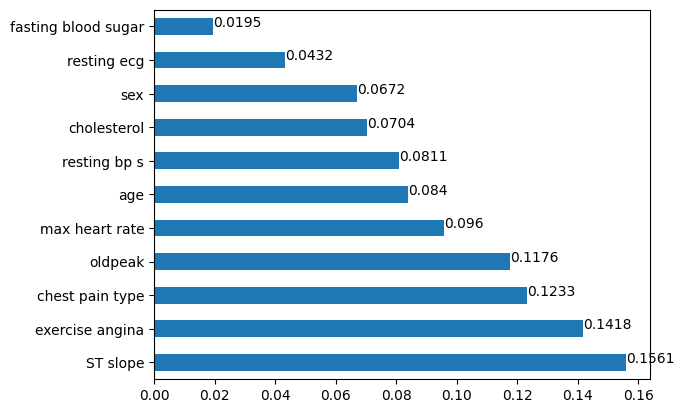

In [41]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)


print(model.feature_importances_)


feat_importances = pd.Series(model.feature_importances_, index=X.columns)


feat_importances.nlargest(13).plot(kind='barh')


for index, value in enumerate(feat_importances.nlargest(13)):
    plt.text(value, index, str(round(value, 4)))


plt.show()

In [42]:

# print (X)
X = X.drop(["fasting blood sugar", "resting ecg", "cholesterol"], axis = 1)

In [43]:
X.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope'],
      dtype='object')

In [44]:
# #Scale all values for good Accuracy
# sc = StandardScaler()
# col = ['age', 'sex', 'chest pain type', 'resting bp s', 'max heart rate',
#        'exercise angina', 'oldpeak', 'ST slope']
# X[col] = sc.fit_transform(X[col])
# X.head()

In [45]:
# asdfa

In [47]:
#split the data 
X_train , X_test  , y_train , y_test=train_test_split(X, y , test_size=0.2 , random_state=4)

In [48]:
X_train.head()

,age,sex,chest pain type,resting bp s,max heart rate,exercise angina,oldpeak,ST slope
260,42,1,4,140,170,0,0.0,1
326,45,1,3,130,144,0,0.1,1
376,48,1,4,140,159,1,1.5,1
668,53,1,4,140,155,1,3.1,3
575,42,1,3,120,194,0,0.8,3


In [51]:
dataset_num=X_train[["age", "resting bp s", "max heart rate"]]
dataset_cat=X_train[["sex","chest pain type", "exercise angina" , "oldpeak" , "ST slope"]]



In [64]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder , MinMaxScaler , OrdinalEncoder

std_list=list(dataset_num)
cat_list=list(dataset_cat)
full_pipeline=ColumnTransformer([
    ("std" , MinMaxScaler() , std_list),
    ("1hot" ,OneHotEncoder()  , cat_list),
])
x_train_prepared=full_pipeline.fit_transform(X_train)
x_train_prepared.toarray()

array([[0.28571429, 0.65753425, 0.75572519, ..., 1.        , 0.        ,
        0.        ],
       [0.34693878, 0.52054795, 0.55725191, ..., 1.        , 0.        ,
        0.        ],
       [0.40816327, 0.65753425, 0.67175573, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.18367347, 0.38356164, 0.75572519, ..., 1.        , 0.        ,
        0.        ],
       [0.26530612, 0.38356164, 0.51145038, ..., 0.        , 1.        ,
        0.        ],
       [0.57142857, 0.79452055, 0.40458015, ..., 0.        , 1.        ,
        0.        ]])

In [66]:
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score
from sklearn.model_selection import cross_val_predict , GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
import itertools    
from sklearn.feature_selection import SelectKBest , f_regression

In [68]:
sample_data=X_train.iloc[:10]
sample_label=y_train[:10]
sample_data_pre=full_pipeline.transform(sample_data)

In [70]:
# I picked this code from the IBM course for classification
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')

In [71]:
def sample_data(model):
    print ("prediction :" ,  model.predict(sample_data_pre))
    print  ("labels:" ,  list(sample_label))

In [72]:
def gridsearchcv(param_grid , model):
    
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search=grid.fit(x_train_prepared, y_train)
    print("Best Hyperparameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

In [73]:
knn= KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights='distance', algorithm='ball_tree')
knn.fit(x_train_prepared,y_train)
sample_data(knn)

prediction : [0 0 1 1 0 1 0 1 1 0]
labels: [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]


In [74]:
knn_pred = cross_val_predict(knn, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, knn_pred)
recall = recall_score(y_train, knn_pred)
fscore=f1_score(y_train ,knn_pred )
accuracy=accuracy_score(y_train ,knn_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8955696202531646
Recall score: 0.8654434250764526
fscore score: 0.880248833592535
accuracy score: 0.8973333333333333


In [75]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'] 
}
gridsearchcv(param_grid_knn , KNeighborsClassifier() )

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Accuracy: 0.924


              precision    recall  f1-score   support

           0       0.90      0.92      0.91       423
           1       0.90      0.87      0.88       327

    accuracy                           0.90       750
   macro avg       0.90      0.89      0.90       750
weighted avg       0.90      0.90      0.90       750

Confusion matrix, without normalization
[[390  33]
 [ 44 283]]


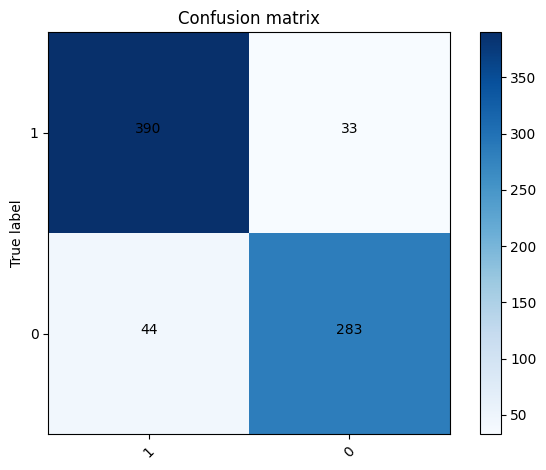

In [76]:
cm=confusion_matrix(y_train, knn_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, knn_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [77]:
tree= DecisionTreeClassifier(criterion= 'gini', max_depth =20, max_features='sqrt', min_samples_leaf= 4,min_samples_split=10, random_state=None, splitter='random')
tree.fit(x_train_prepared,y_train)
sample_data(tree)

prediction : [0 0 1 1 1 1 0 1 1 0]
labels: [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]


In [78]:
tree_pred = cross_val_predict(tree, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, tree_pred)
recall = recall_score(y_train, tree_pred)
fscore=f1_score(y_train ,tree_pred )
accuracy=accuracy_score(y_train ,tree_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8181818181818182
Recall score: 0.7431192660550459
fscore score: 0.7788461538461539
accuracy score: 0.816


In [79]:
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [None, 42]  
}
gridsearchcv(param_grid_tree , DecisionTreeClassifier())

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}
Best Accuracy: 0.9013333333333332


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       423
           1       0.82      0.74      0.78       327

    accuracy                           0.82       750
   macro avg       0.82      0.81      0.81       750
weighted avg       0.82      0.82      0.81       750

Confusion matrix, without normalization
[[369  54]
 [ 84 243]]


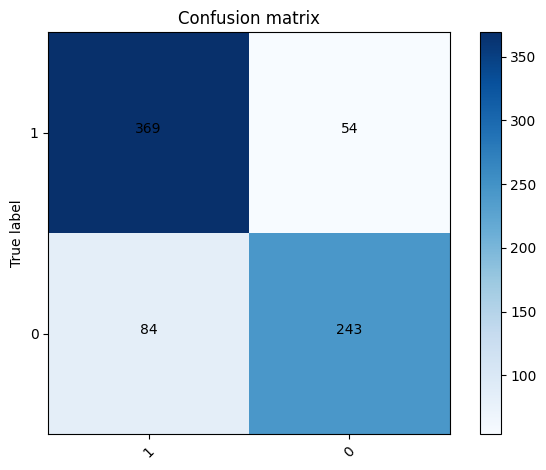

In [80]:
cm=confusion_matrix(y_train, tree_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, tree_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [81]:
lr= LogisticRegression(C= 1, penalty= 'l2')
lr.fit(x_train_prepared,y_train)
sample_data(lr)

prediction : [0 0 0 1 0 1 1 1 1 0]
labels: [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]


In [82]:
lr_pred = cross_val_predict(lr, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, lr_pred)
recall = recall_score(y_train, lr_pred)
fscore=f1_score(y_train ,lr_pred )
accuracy=accuracy_score(y_train ,lr_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.826625386996904
Recall score: 0.8165137614678899
fscore score: 0.8215384615384616
accuracy score: 0.8453333333333334


In [83]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100] 
}
gridsearchcv(param_grid_lr , LogisticRegression())

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}
Best Accuracy: 0.8453333333333333


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       423
           1       0.83      0.82      0.82       327

    accuracy                           0.85       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.85      0.85      0.85       750

Confusion matrix, without normalization
[[367  56]
 [ 60 267]]


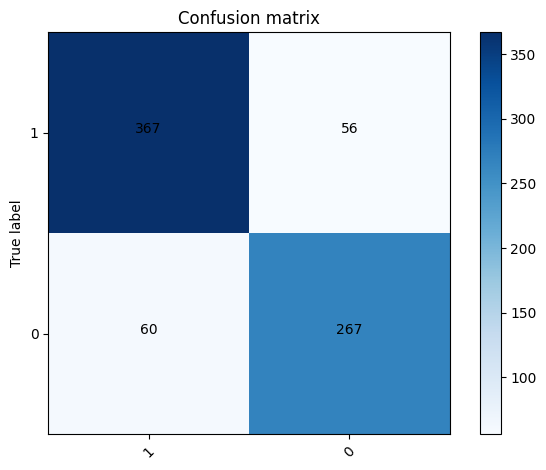

In [84]:
cm=confusion_matrix(y_train, lr_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, lr_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

In [85]:
svm= SVC(C= 1000, gamma= 1, kernel='rbf')
svm.fit(x_train_prepared,y_train)
sample_data(svm)

prediction : [0 0 1 1 0 1 0 1 1 0]
labels: [0, 0, 1, 1, 0, 1, 0, 1, 1, 0]


In [93]:
svm_pred = cross_val_predict(svm, x_train_prepared, y_train, cv=5)
precision = precision_score(y_train, svm_pred)
recall = recall_score(y_train, svm_pred)
fscore=f1_score(y_train ,svm_pred )
accuracy=accuracy_score(y_train ,svm_pred)
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")
print(f"fscore score: {fscore}")
print(f"accuracy score: {accuracy}")

Precision score: 0.8786885245901639
Recall score: 0.8195718654434251
fscore score: 0.8481012658227848
accuracy score: 0.872


In [92]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],}  
gridsearchcv(param_grid_svm , SVC())

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Accuracy: 0.8746666666666666


              precision    recall  f1-score   support

           0       0.86      0.87      0.86       423
           1       0.83      0.82      0.82       327

    accuracy                           0.85       750
   macro avg       0.84      0.84      0.84       750
weighted avg       0.85      0.85      0.85       750

Confusion matrix, without normalization
[[367  56]
 [ 60 267]]


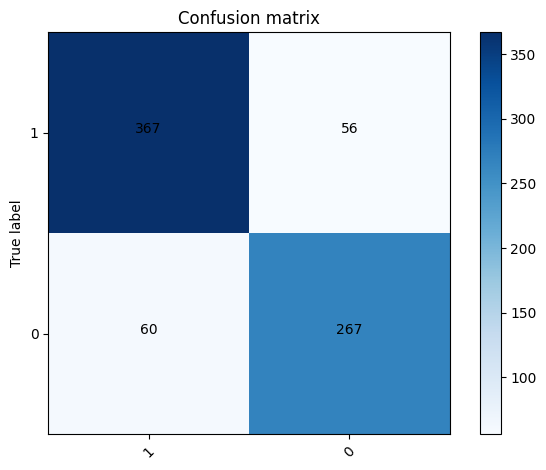

In [90]:
cm=confusion_matrix(y_train, lr_pred)
np.set_printoptions(precision=2)
print (classification_report(y_train, lr_pred))
plt.figure()
plot_confusion_matrix(cm, classes=['1','0'],normalize= False,  title='Confusion matrix')

ValueError: Found unknown categories [3.4] in column 3 during transform